# Physical activity monitoring project - ML model traning



In [1]:
# Log in to your W&B account
# import wandb

import random
import math
import os
import pandas as pd
import numpy as np

# wandb.login()

# Open data chunks

In [7]:

# Define the path to your file
folder_path = r"C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\activity_chunks_v1"

file_name_without_ext = "subject101"

activity_ids = [3, 5, 6, 7]
activity_id = 3 # set a default activity id
chunk_count = 5 # set a default chunk count

file_name = f"{file_name_without_ext}_activity_{activity_id}_chunk_{chunk_count}.csv"
file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the data, specifying the correct delimiter (comma) and no header
csv_data = np.loadtxt(file_path, delimiter=',', dtype=float, comments=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='utf-8', max_rows=None)
np.set_printoptions(precision=6, suppress=True)

print(f"Loaded data from {file_path}")
print(f"Data shape: {csv_data.shape}")  
print(csv_data)

Loaded data from C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\activity_chunks_v1\subject101_activity_3_chunk_5.csv
Data shape: (100, 45)
[[549.33      3.      104.      ...  37.8959   -5.75508   1.     ]
 [549.34      3.      104.      ...  38.8701   -5.50071   1.     ]
 [549.35      3.      104.      ...  37.5468   -5.8872    1.     ]
 ...
 [550.3       3.      105.      ...  38.5598   -5.8717    1.     ]
 [550.31      3.      105.      ...  37.6758   -5.509     1.     ]
 [550.32      3.      105.      ...  37.5576   -5.51211   1.     ]]


## Statistical Features + RandomForest

In [27]:
import os, glob, re, random, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

DATA_DIR = r"C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1"
TARGET = [3,5,6,7]
SAMPLES_PER_CLASS = 300
rng = random.Random(42)

def parse_activity(fp):
    m = re.search(r"activity_(\d+)_chunk", os.path.basename(fp))
    return int(m.group(1)) if m else None

# Collect
paths = [p for p in glob.glob(os.path.join(DATA_DIR,'*.csv')) if parse_activity(p) in TARGET]
by_act = {a: [] for a in TARGET}
for p in paths: by_act[parse_activity(p)].append(p)
for a in TARGET: rng.shuffle(by_act[a])
sel = []
for a in TARGET: sel.extend(by_act[a][:SAMPLES_PER_CLASS])






In [28]:
for file_path in sel:

    # Check if the file exists
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    else:
        print(f"exist: {file_path}")

# Load the data, specifying the correct delimiter (comma) and no header
# csv_data = np.loadtxt(file_path, delimiter=',', dtype=float, comments=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='utf-8', max_rows=None)
# np.set_printoptions(precision=6, suppress=True)




exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_69.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_136.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_10.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_80.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_5.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_109.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chunk_169.csv
exist: C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\PAMAP2_Dataset\\activity_chunks_v1\subject101_activity_3_chu

In [29]:
Xf, y = [], []

for fp in sel:
    arr = np.loadtxt(fp, delimiter=',', dtype=float)
    feat_idx = [i for i in range(arr.shape[1]) if i not in (0,1)]  # drop timestamp & activity
    seq = arr[:, feat_idx]  # (100, F)
    # compute features
    mu = seq.mean(axis=0)
    sd = seq.std(axis=0, ddof=0)
    mn = seq.min(axis=0)
    mx = seq.max(axis=0)
    rg = mx - mn
    energy = (seq**2).sum(axis=0)/seq.shape[0]
    feat_vec = np.concatenate([mu, sd, mn, mx, rg, energy])
    Xf.append(feat_vec)
    y.append(parse_activity(fp))

Xf = np.vstack(Xf)
y = np.array(y)



In [30]:
print(Xf.shape, y.shape)
print(y)

(522, 258) (522,)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 

In [31]:
# Train/val/test split
idx = np.arange(len(Xf)); rng.shuffle(list(idx))
tr_end = int(0.7*len(idx)); va_end = int(0.85*len(idx))

tr, va, te = idx[:tr_end], idx[tr_end:va_end], idx[va_end:]
Xtr, Xva, Xte = Xf[tr], Xf[va], Xf[te]
ytr, yva, yte = y[tr], y[va], y[te]

scaler = StandardScaler().fit(Xtr)
Xtr = scaler.transform(Xtr); Xva = scaler.transform(Xva); Xte = scaler.transform(Xte)

clf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)

clf.fit(Xtr, ytr)
print('Val acc:', clf.score(Xva, yva))
print('Test acc:', clf.score(Xte, yte))

print(classification_report(yte, clf.predict(Xte)))
print(confusion_matrix(yte, clf.predict(Xte)))

Val acc: 0.8076923076923077
Test acc: 0.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00      79.0

    accuracy                           0.00      79.0
   macro avg       0.00      0.00      0.00      79.0
weighted avg       0.00      0.00      0.00      79.0

[[ 0  0  0]
 [ 0  0  0]
 [ 8 71  0]]


C:\Users\malit\Documents\GitHub\AI_ML_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\malit\Documents\GitHub\AI_ML_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\malit\Documents\GitHub\AI_ML_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

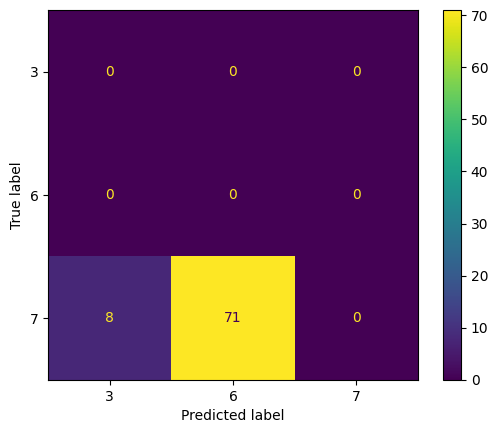

In [32]:
# draw confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, Xte, yte)
plt.show()
